# Multilayer Perceptron

In [2]:
#import libraries

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedShuffleSplit


In [16]:
## Classification: MNIST

In [6]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [3]:
# Load dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

X_train /= 255
X_test /= 255

In [4]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 784)
Shape of test data (10000, 784)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [5]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [7]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(), cv =cv)
print("Training Accuracy: {:.2f} %".format(cv_score.mean()*100))

Training Accuracy: 97.72 %


In [8]:
mlpc.predict_proba(X_test[:5])

array([[1.67540336e-13, 1.20206455e-15, 3.16822686e-11, 6.38436255e-09,
        3.42376688e-20, 1.40613154e-14, 2.07057259e-26, 9.99999994e-01,
        9.89849954e-13, 1.71120797e-11],
       [9.36342748e-15, 9.95914896e-12, 9.99999999e-01, 1.12205446e-09,
        4.78802277e-33, 1.29866014e-12, 4.70057402e-14, 1.77436755e-24,
        8.60719240e-12, 4.35325146e-22],
       [2.99954614e-10, 9.99976933e-01, 5.02186461e-06, 7.44412542e-09,
        1.53334311e-08, 6.50067371e-08, 5.67822591e-07, 1.80276817e-06,
        1.55861802e-05, 7.73781887e-10],
       [1.00000000e+00, 3.55098874e-17, 1.91774670e-10, 3.66240264e-16,
        1.56163177e-16, 1.56899474e-15, 2.20691949e-13, 4.76529723e-12,
        7.21672630e-20, 2.92081584e-14],
       [1.31436473e-12, 1.07630912e-15, 2.74923832e-11, 5.49491193e-15,
        9.99958693e-01, 1.22044885e-14, 1.12554216e-11, 4.05233462e-10,
        2.69083086e-12, 4.13070008e-05]])

In [9]:
y_pred = mlpc.predict(X_test)

In [12]:
print("Train_accuracy: {:.2f} %".format(accuracy_score(y_train, mlpc.predict(X_train))*100))
print("Train_accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

Train_accuracy: 100.00 %
Train_accuracy: 97.98 %


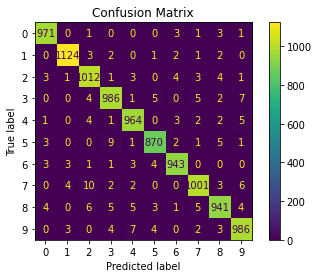

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [14]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Loss curve')

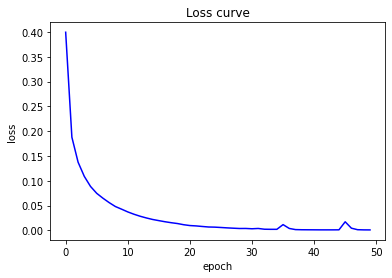

In [15]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')

## Regression: California housing

In [18]:
from sklearn.datasets import fetch_california_housing

from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, ShuffleSplit

np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [19]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (16512, 8)
Shape of test data (4128, 8)
Shape of training labels (16512,)
Shape of test labels (4128,)


In [22]:
pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', MLPRegressor(hidden_layer_sizes=(32)))])

cv_results = cross_validate(pipe, X_train, y_train, cv = cv,
                            scoring = "neg_mean_absolute_percentage_error",
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=2)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.214 +/- 0.004
Mean absolute error of linear regression model on the test set:
0.215 +/- 0.005


In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [24]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.20517616916407153

In [25]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.216801641868833

Text(0, 0.5, 'predicted')

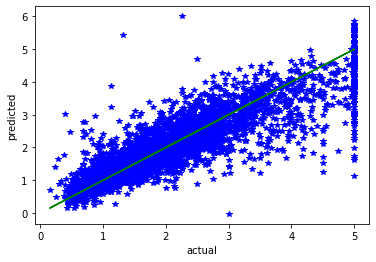

In [26]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')